In [1]:
import torch
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mnist_train.csv')

In [3]:
#df.iloc[0]

In [7]:
torch.cuda.is_available()

False

In [6]:
cuda0 = torch.device('cuda:0')

In [9]:
one = torch.from_numpy(df.iloc[0].values).int()

In [10]:
one.shape

torch.Size([785])

In [11]:
one = torch.reshape(one[1:], (28,28))

In [12]:
one.shape

torch.Size([28, 28])

In [13]:
one[4:7,4:14]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   3,  18],
        [  0,   0,   0,   0,  30,  36,  94, 154, 170, 253]], dtype=torch.int32)

In [14]:
df_one = pd.DataFrame(one)
df_one = df_one.astype(float)

In [15]:
df_one.style.background_gradient('Greys')



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [37]:
seven_tensors = torch.Tensor(df[df.label == 7][df.columns[1:]].values).int().reshape(-1,28,28)
three_tensors = torch.Tensor(df[df.label == 3][df.columns[1:]].values).int().reshape(-1,28,28)

In [18]:
len(three_tensors),len(seven_tensors)

(6131, 6265)

In [19]:
import matplotlib.pyplot as plt

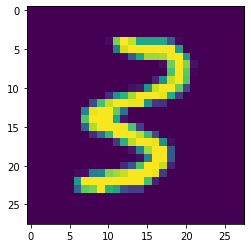

In [20]:
plt.imshow(three_tensors[500])

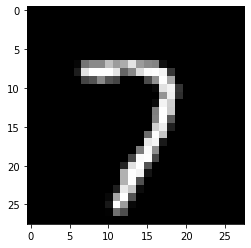

In [21]:
plt.imshow(seven_tensors[200], cmap='gray')

In [28]:
stacked_sevens = seven_tensors.float()/255
stacked_threes = three_tensors.float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [29]:
len(stacked_threes.shape)

3

In [30]:
stacked_threes.ndim

3

In [35]:
mean3 = stacked_threes.mean(0)

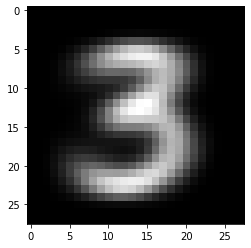

In [34]:
plt.imshow(stacked_threes.mean(0), cmap='gray')

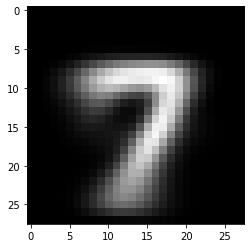

In [36]:
mean7 = stacked_sevens.mean(0)
plt.imshow(mean7, cmap='gray')

In [50]:
a_3 = stacked_threes[6]

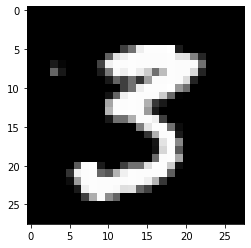

In [51]:
plt.imshow(a_3, cmap='gray')

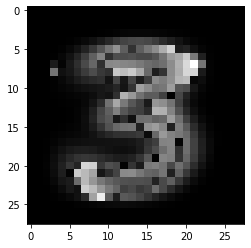

In [52]:
dist_3_abs_tensor = (a_3-mean3).abs()
plt.imshow(dist_3_abs_tensor, cmap='gray')

In [53]:
dist_3_abs = dist_3_abs_tensor.mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1147), tensor(0.2066))

In [54]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1558), tensor(0.2998))